In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import model_selection, grid_search, metrics, ensemble
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19932 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 937.5+ KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 6 columns):
id                    4999 non-null float64
msno                  4999 non-null object
song_id               4999 non-null object
source_system_tab     4996 non-null object
source_screen_name    4781 non-null object
source_type           4997 non-null object
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


In [46]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
song_id        39999 non-null object
song_length    39999 non-null int64
genre_ids      39282 non-null object
artist_name    39999 non-null object
composer       23203 non-null object
lyricist       10913 non-null object
language       39999 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [47]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [48]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


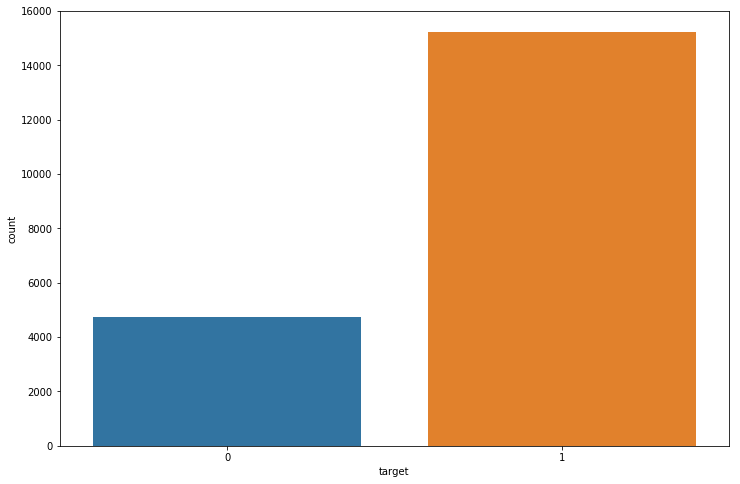

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(train['target'])

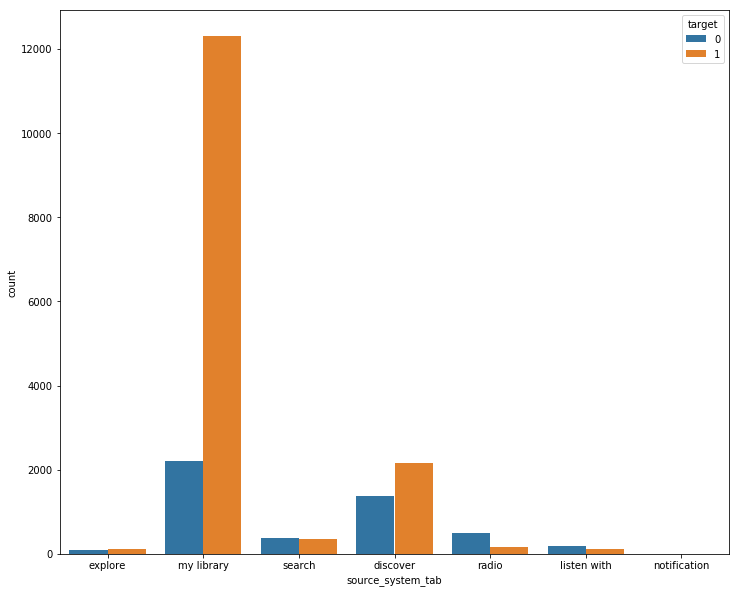

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'],hue=train['target'])

[Text(0,0,'online-playlist'),
 Text(0,0,'local-playlist'),
 Text(0,0,'local-library'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'album'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'radio'),
 Text(0,0,'song'),
 Text(0,0,'listen-with'),
 Text(0,0,'artist'),
 Text(0,0,'topic-article-playlist')]

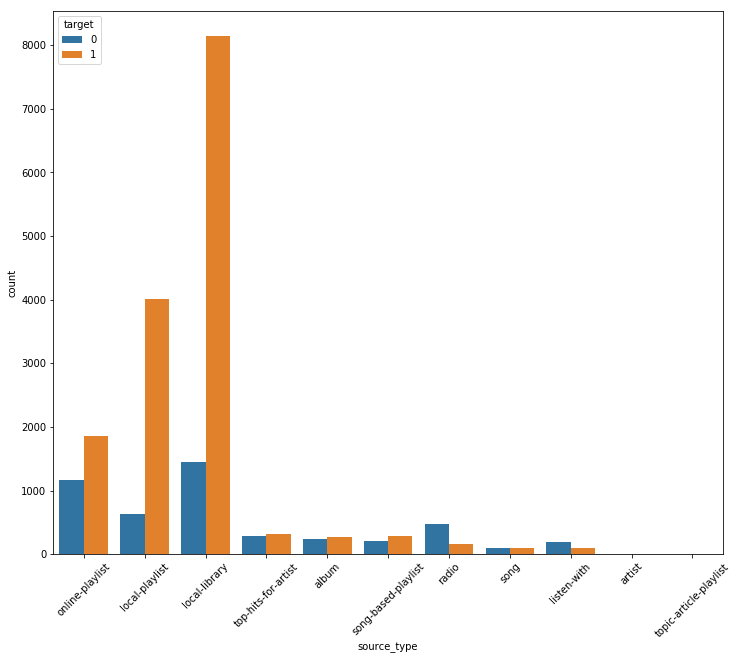

In [51]:
plt.figure(figsize=(12,10))
g = sns.countplot(train['source_type'],hue=train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [52]:
df_train = train.merge(songs,how="left",on="song_id")

In [53]:
df_merged = df_train.merge(members, on='msno', how='inner')

In [54]:
df_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,247803.0,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,7,20120102,20171005


In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 19998
Data columns (total 18 columns):
msno                      19999 non-null object
song_id                   19999 non-null object
source_system_tab         19932 non-null object
source_screen_name        19423 non-null object
source_type               19949 non-null object
target                    19999 non-null int64
song_length               2845 non-null float64
genre_ids                 2799 non-null object
artist_name               2845 non-null object
composer                  2243 non-null object
lyricist                  1780 non-null object
language                  2845 non-null float64
city                      19999 non-null int64
bd                        19999 non-null int64
gender                    12287 non-null object
registered_via            19999 non-null int64
registration_init_time    19999 non-null int64
expiration_date           19999 non-null int64
dtypes: float64(2), int64(6), object(

In [56]:
# Count Na in %
df_merged.isnull().sum()/df_merged.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.335017
source_screen_name         2.880144
source_type                0.250013
target                     0.000000
song_length               85.774289
genre_ids                 86.004300
artist_name               85.774289
composer                  88.784439
lyricist                  91.099555
language                  85.774289
city                       0.000000
bd                         0.000000
gender                    38.561928
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [57]:
# Replace NA
for i in df_merged.select_dtypes(include=['object']).columns:
    df_merged[i][df_merged[i].isnull()] = 'unknown'
df_merged = df_merged.fillna(value=0)

C:\Users\ourpc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_merged['source_system_tab'] = df_merged['source_system_tab'].astype("category")
df_merged['source_type'] = df_merged['source_type'].astype("category")

In [59]:
df_merged['language'].value_counts()

 0.0     17154
 3.0      1664
 52.0      624
 31.0      318
-1.0        87
 17.0       75
 10.0       43
 24.0       31
 59.0        3
Name: language, dtype: int64

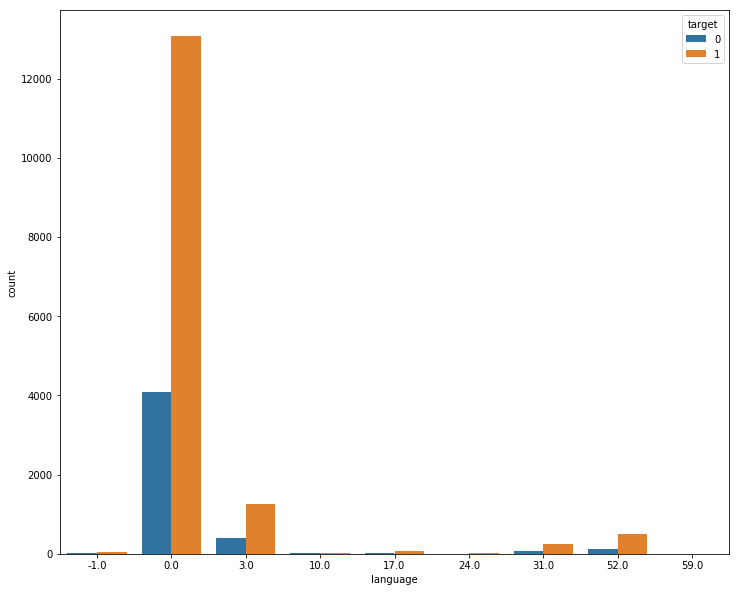

In [60]:
plt.figure(figsize=(12,10))
sns.countplot(df_merged['language'],hue=df_train['target'])

Text(0,0.5,'Count')

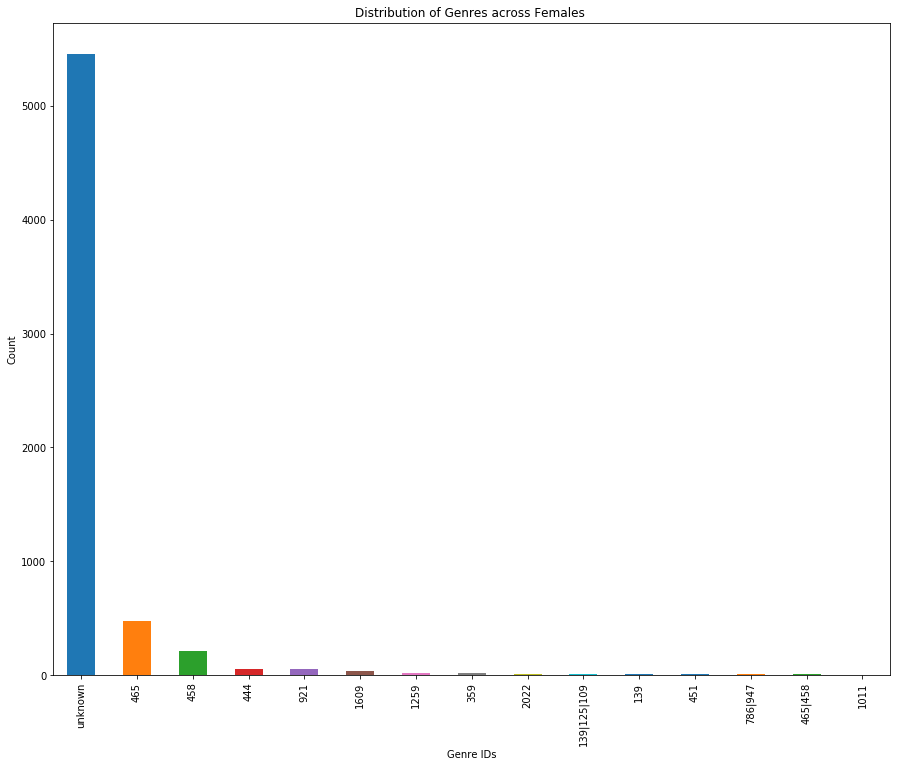

In [61]:
plt.figure(figsize=(15,12))
df_merged.query("gender =='female'")["genre_ids"].value_counts().head(15).plot.bar()
plt.title("Distribution of Genres across Females ")
plt.xlabel("Genre IDs")
plt.ylabel("Count")

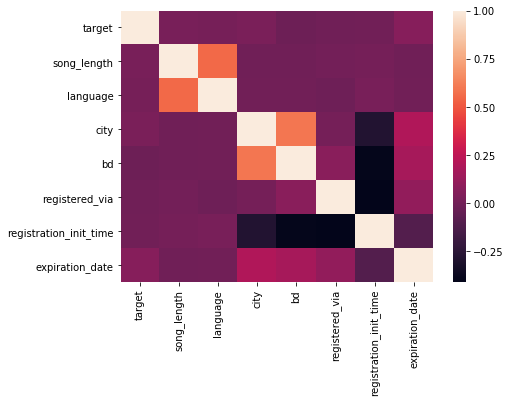

In [62]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df_merged.corr())
plt.show()

In [63]:
# Object data to category
for col in df_merged.select_dtypes(include=['object']).columns:
    df_merged[col] = df_merged[col].astype('category')
    
# Encoding categorical features
for col in df_merged.select_dtypes(include=['category']).columns:
    df_merged[col] = df_merged[col].cat.codes

In [64]:
# Train & Test split
target = df_merged.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(df_merged, target, test_size = 0.3)

In [65]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
# model.fit(df_merged[df_merged.columns[df_merged.columns != 'target']], df_merged.target)
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
# Predicting
predict_labels = model.predict(test_data)

In [67]:
print(metrics.classification_report(test_labels, predict_labels))

             precision    recall  f1-score   support

          0       0.70      0.52      0.59      1432
          1       0.86      0.93      0.89      4568

avg / total       0.82      0.83      0.82      6000



In [68]:
df_plot = pd.DataFrame({'features': df_merged.columns[df_merged.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

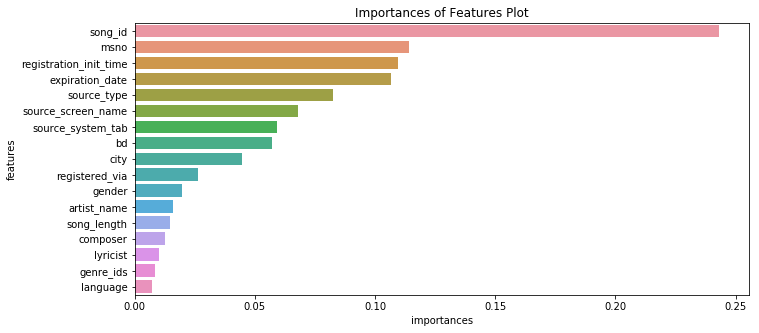

In [69]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()